<a href="https://colab.research.google.com/github/milaomrani/Cavitiy_classification/blob/main/Cavities_image_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os

Databse link 
"https://drive.google.com/file/d/1UZGa-2YGlmDdPqr6ilzvF58BJb0Oobm3/view?usp=share_link"

In [ ]:
!unzip /content/drive/MyDrive/DataSet/dental_dataset.zip

In [5]:
ls

database/  drive/  sample_data/


In [8]:
for dir_path, dir_name, file_name in os.walk("/content/dataset"):
  print(f"There are {len(dir_name)} directories and {len(file_name)} images in {dir_path} ")

There are 2 directories and 0 images in /content/dataset 
There are 2 directories and 0 images in /content/dataset/test 
There are 0 directories and 97 images in /content/dataset/test/cavity 
There are 0 directories and 79 images in /content/dataset/test/no_cavity 
There are 2 directories and 0 images in /content/dataset/train 
There are 0 directories and 389 images in /content/dataset/train/cavity 
There are 0 directories and 319 images in /content/dataset/train/no_cavity 


In [54]:
import pathlib
import numpy as np

data_dir = pathlib.Path("dataset/train/")
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_name)



['cavity' 'no_cavity']


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_rand_img(target_dir, target_class):
  target_folder = target_dir + target_class

  rand_img = random.sample(os.listdir(target_folder), 1)

  im = mpimg.imread(target_folder + "/" + rand_img[0])
  plt.imshow(im)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {im.shape}")

  return im

Image shape: (350, 1000, 3)


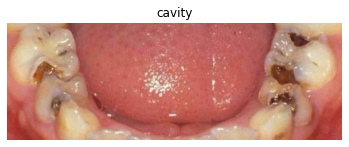

In [10]:
img = view_rand_img("/content/dataset/train/",
                    "cavity")

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "/content/dataset/train"
test_dir = "/content/dataset/test"

data_train = train_datagen.flow_from_directory(train_dir,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode="binary",
                                          seed=42)

data_test = test_datagen.flow_from_directory(test_dir,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode="binary",
                                          seed=42)

Found 708 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


In [24]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [25]:
model_2 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [26]:
model_2.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [27]:
history_2 = model_2.fit(data_train,
                        steps_per_epoch=len(data_train),
                        epochs=5,
                        validation_data = data_test,
                        validation_steps=len(data_test))

Epoch 1/5
23/23 [==============================] - 11s 444ms/step - loss: 0.6982 - accuracy: 0.4802 - val_loss: 0.6910 - val_accuracy: 0.5568
Epoch 2/5
23/23 [==============================] - 10s 419ms/step - loss: 0.6905 - accuracy: 0.5537 - val_loss: 0.6886 - val_accuracy: 0.5511
Epoch 3/5
23/23 [==============================] - 10s 434ms/step - loss: 0.6883 - accuracy: 0.5508 - val_loss: 0.6873 - val_accuracy: 0.5511
Epoch 4/5
23/23 [==============================] - 10s 436ms/step - loss: 0.6853 - accuracy: 0.5607 - val_loss: 0.6828 - val_accuracy: 0.5511
Epoch 5/5
23/23 [==============================] - 10s 428ms/step - loss: 0.6828 - accuracy: 0.5551 - val_loss: 0.6782 - val_accuracy: 0.5568


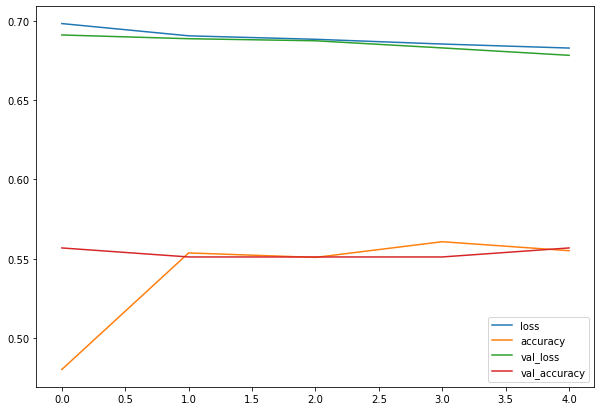

In [28]:
import pandas as pd

pd.DataFrame(history_2.history).plot(figsize=(10, 7))

In [29]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

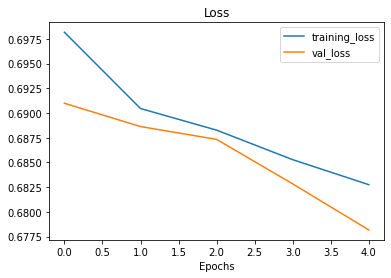

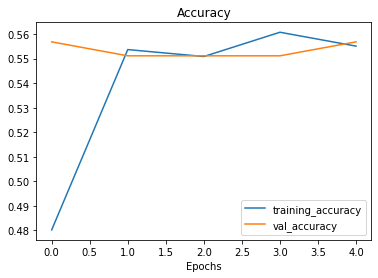

In [30]:
# plot_loss_curves(history_1), 
plot_loss_curves(history_2)

In [31]:
model_3 = Sequential([
    Conv2D(20, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(20, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(20, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(20, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(20, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [32]:
model_3.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [33]:
history_3 = model_3.fit(data_train,
                        steps_per_epoch=len(data_train),
                        epochs=5,
                        validation_data = data_test,
                        validation_steps=len(data_test))

Epoch 1/5
23/23 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5141

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


23/23 [==============================] - 12s 470ms/step - loss: 0.6924 - accuracy: 0.5141 - val_loss: 0.6886 - val_accuracy: 0.5511
Epoch 2/5
23/23 [==============================] - 12s 546ms/step - loss: 0.6899 - accuracy: 0.5494 - val_loss: 0.6888 - val_accuracy: 0.5511
Epoch 3/5
23/23 [==============================] - 10s 441ms/step - loss: 0.6891 - accuracy: 0.5551 - val_loss: 0.6837 - val_accuracy: 0.5852
Epoch 4/5
23/23 [==============================] - 10s 441ms/step - loss: 0.6868 - accuracy: 0.5537 - val_loss: 0.6895 - val_accuracy: 0.5795
Epoch 5/5
23/23 [==============================] - 10s 435ms/step - loss: 0.6807 - accuracy: 0.5678 - val_loss: 0.6815 - val_accuracy: 0.5625


23/23 [==============================] - 10s 428ms/step - loss: 0.6828 - accuracy: 0.5551 - val_loss: 0.6782 - val_accuracy: 0.5568
 Model_2

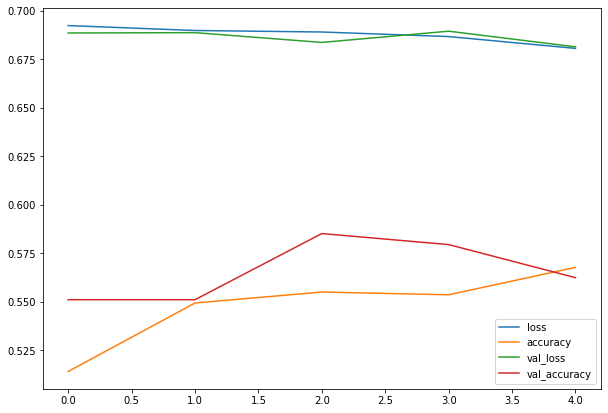

In [34]:
pd.DataFrame(history_3.history).plot(figsize=(10,7))

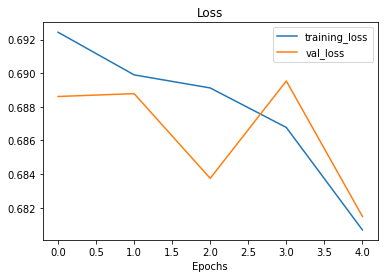

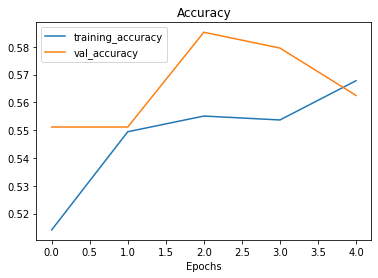

In [35]:
plot_loss_curves(history_3)

In [36]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_4 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(data_train,
                        epochs=5,
                        steps_per_epoch=len(data_train),
                        validation_data=data_test,
                        validation_steps=len(data_test))

Epoch 1/5
23/23 [==============================] - ETA: 0s - loss: 0.7035 - accuracy: 0.5226

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


23/23 [==============================] - 12s 440ms/step - loss: 0.7035 - accuracy: 0.5226 - val_loss: 0.6851 - val_accuracy: 0.5227
Epoch 2/5
23/23 [==============================] - 10s 442ms/step - loss: 0.6736 - accuracy: 0.5946 - val_loss: 0.6415 - val_accuracy: 0.6250
Epoch 3/5
23/23 [==============================] - 10s 437ms/step - loss: 0.6173 - accuracy: 0.6667 - val_loss: 0.6129 - val_accuracy: 0.6420
Epoch 4/5
23/23 [==============================] - 10s 454ms/step - loss: 0.5398 - accuracy: 0.7458 - val_loss: 0.6164 - val_accuracy: 0.7045
Epoch 5/5
23/23 [==============================] - 10s 439ms/step - loss: 0.4778 - accuracy: 0.7853 - val_loss: 0.6284 - val_accuracy: 0.6875


model_2: 23/23 [==============================] - 10s 428ms/step - loss: 0.6828 - accuracy: 0.5551 - val_loss: 0.6782 - val_accuracy: 0.5568

model_3: 23/23 [==============================] - 10s 435ms/step - loss: 0.6807 - accuracy: 0.5678 - val_loss: 0.6815 - val_accuracy: 0.5625

model_4: 23/23 [==============================] - 10s 439ms/step - loss: 0.4778 - accuracy: 0.7853 - val_loss: 0.6284 - val_accuracy: 0.6875


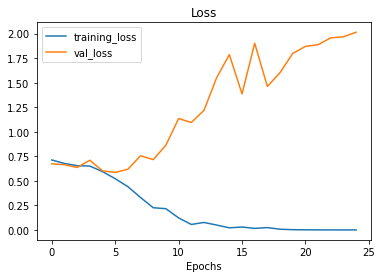

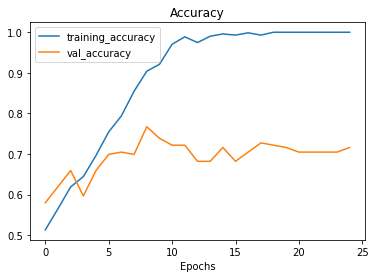

In [32]:
plot_loss_curves(history_4)

In [37]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

In [39]:
train_datagen_aug_shuf = train_datagen_augmented.flow_from_directory(train_dir,
                                                                     target_size=(224,224),
                                                                     class_mode="binary",
                                                                     batch_size=32,
                                                                     shuffle=True)

Found 708 images belonging to 2 classes.


In [40]:
# Create a model 

model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")

])

model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_5 = model_5.fit(train_datagen_aug_shuf,
                        epochs=5,
                        steps_per_epoch=len(train_datagen_aug_shuf),
                        validation_data=data_test,
                        validation_steps=len(data_test))

Epoch 1/5
23/23 [==============================] - 17s 716ms/step - loss: 0.6910 - accuracy: 0.5212 - val_loss: 0.7013 - val_accuracy: 0.5511
Epoch 2/5
23/23 [==============================] - 17s 755ms/step - loss: 0.6831 - accuracy: 0.5438 - val_loss: 0.6786 - val_accuracy: 0.5682
Epoch 3/5
23/23 [==============================] - 16s 711ms/step - loss: 0.6776 - accuracy: 0.5452 - val_loss: 0.6829 - val_accuracy: 0.5568
Epoch 4/5
23/23 [==============================] - 16s 696ms/step - loss: 0.6730 - accuracy: 0.5339 - val_loss: 0.6794 - val_accuracy: 0.5682
Epoch 5/5
23/23 [==============================] - 16s 696ms/step - loss: 0.6696 - accuracy: 0.5381 - val_loss: 0.6842 - val_accuracy: 0.5625


model_2: 23/23 [==============================] - 10s 428ms/step - loss: 0.6828 - accuracy: 0.5551 - val_loss: 0.6782 - val_accuracy: 0.5568

model_3: 23/23 [==============================] - 10s 435ms/step - loss: 0.6807 - accuracy: 0.5678 - val_loss: 0.6815 - val_accuracy: 0.5625

model_4: 23/23 [==============================] - 10s 439ms/step - loss: 0.4778 - accuracy: 0.7853 - val_loss: 0.6284 - val_accuracy: 0.6875

model_5: 23/23 [==============================] - 16s 696ms/step - loss: 0.6696 - accuracy: 0.5381 - val_loss: 0.6842 - val_accuracy: 0.5625


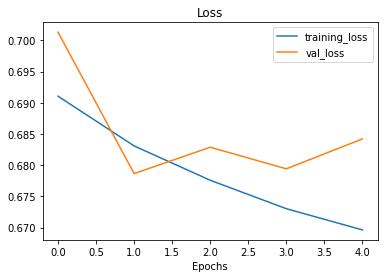

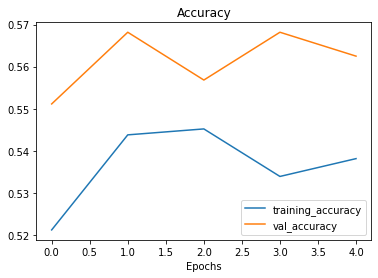

In [41]:
plot_loss_curves(history_5)

In [42]:
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")

])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_datagen_aug_shuf,
                        epochs=5,
                        steps_per_epoch=len(train_datagen_aug_shuf),
                        validation_data=data_test,
                        validation_steps=len(data_test))

Epoch 1/5
23/23 [==============================] - 22s 970ms/step - loss: 0.7490 - accuracy: 0.5099 - val_loss: 0.6705 - val_accuracy: 0.5909
Epoch 2/5
23/23 [==============================] - 16s 702ms/step - loss: 0.6829 - accuracy: 0.5523 - val_loss: 0.6746 - val_accuracy: 0.5852
Epoch 3/5
23/23 [==============================] - 16s 705ms/step - loss: 0.6805 - accuracy: 0.5650 - val_loss: 0.6689 - val_accuracy: 0.5852
Epoch 4/5
23/23 [==============================] - 16s 671ms/step - loss: 0.6754 - accuracy: 0.5621 - val_loss: 0.6648 - val_accuracy: 0.5795
Epoch 5/5
23/23 [==============================] - 16s 704ms/step - loss: 0.6742 - accuracy: 0.5819 - val_loss: 0.6565 - val_accuracy: 0.5795


model_2: 23/23 [==============================] - 10s 428ms/step - loss: 0.6828 - accuracy: 0.5551 - val_loss: 0.6782 - val_accuracy: 0.5568

model_3: 23/23 [==============================] - 10s 435ms/step - loss: 0.6807 - accuracy: 0.5678 - val_loss: 0.6815 - val_accuracy: 0.5625

model_4: 23/23 [==============================] - 10s 439ms/step - loss: 0.4778 - accuracy: 0.7853 - val_loss: 0.6284 - val_accuracy: 0.6875

model_5: 23/23 [==============================] - 16s 696ms/step - loss: 0.6696 - accuracy: 0.5381 - val_loss: 0.6842 - val_accuracy: 0.5625


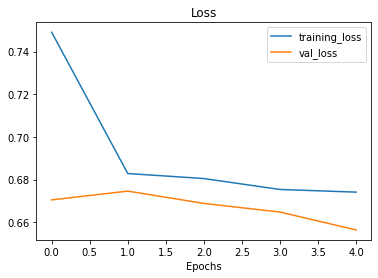

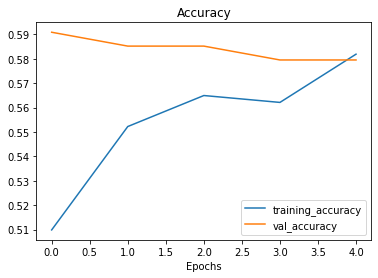

In [46]:
plot_loss_curves(history_6)

In [51]:
# Create a CNN model based model_4
model_7 = Sequential([
  Conv2D(64, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(64, 3, activation='relu'),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(64, 3, activation='relu'),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(data_train,
                        epochs=5,
                        steps_per_epoch=len(data_train),
                        validation_data=data_test,
                        validation_steps=len(data_test))

Epoch 1/5
23/23 [==============================] - ETA: 0s - loss: 0.6949 - accuracy: 0.5508

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


23/23 [==============================] - 14s 544ms/step - loss: 0.6949 - accuracy: 0.5508 - val_loss: 0.6858 - val_accuracy: 0.5511
Epoch 2/5
23/23 [==============================] - 11s 506ms/step - loss: 0.6890 - accuracy: 0.5537 - val_loss: 0.6860 - val_accuracy: 0.5511
Epoch 3/5
23/23 [==============================] - 11s 477ms/step - loss: 0.6910 - accuracy: 0.5353 - val_loss: 0.6905 - val_accuracy: 0.5625
Epoch 4/5
23/23 [==============================] - 11s 482ms/step - loss: 0.6861 - accuracy: 0.5819 - val_loss: 0.6555 - val_accuracy: 0.6250
Epoch 5/5
23/23 [==============================] - 11s 484ms/step - loss: 0.6777 - accuracy: 0.5791 - val_loss: 0.6705 - val_accuracy: 0.5795


In [55]:
import numpy as np

class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['cavity' 'no_cavity']


In [57]:
import matplotlib.image as mpimg
!wget https://img.dentaleconomics.com/files/base/ebm/de/image/2021/08/16x9/2109DECbar_p01.610b0972c9959.png?auto=format,compress&w=500&h=281&fit=clip

cavity = mpimg.imread("cavity.jpeg")

--2022-11-05 00:55:50--  https://img.dentaleconomics.com/files/base/ebm/de/image/2021/08/16x9/2109DECbar_p01.610b0972c9959.png?auto=format,compress
Resolving img.dentaleconomics.com (img.dentaleconomics.com)... 199.232.150.208, 2a04:4e42:65::720
Connecting to img.dentaleconomics.com (img.dentaleconomics.com)|199.232.150.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90610 (88K) [image/jpeg]
Saving to: ‘2109DECbar_p01.610b0972c9959.png?auto=format,compress’

2109DECbar_p01.610b 100%[===================>]  88.49K  --.-KB/s    in 0.004s  

2022-11-05 00:55:50 (19.4 MB/s) - ‘2109DECbar_p01.610b0972c9959.png?auto=format,compress’ saved [90610/90610]



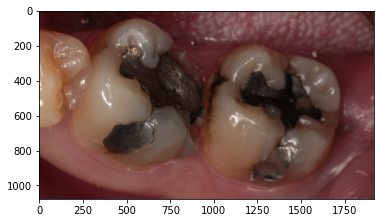

In [58]:
plt.imshow(cavity)

In [63]:
cavity.shape

(1077, 1920, 3)

In [67]:
expand_cav = tf.expand_dims(cavity, axis=0)

In [69]:
expand_cav.shape

TensorShape([1, 1077, 1920, 3])

In [72]:
def load_pred_img(filename, img_shape=224):
  """
  read image from filename and turn it to tensor and reshape it to img_shape
  """
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])

  img = img/255. 
  return img

In [75]:
cavity = load_pred_img("cavity.jpeg")
cavity

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.22352941, 0.05882353, 0.0627451 ],
        [0.21530987, 0.05060399, 0.05452556],
        [0.20392157, 0.04705882, 0.04705882],
        ...,
        [0.2624919 , 0.08994292, 0.09386449],
        [0.24971414, 0.08500826, 0.08892982],
        [0.27534994, 0.10280091, 0.10672248]],

       [[0.22352941, 0.05882353, 0.0627451 ],
        [0.21960784, 0.05490196, 0.05882353],
        [0.21204482, 0.04733894, 0.05126051],
        ...,
        [0.24026425, 0.07555836, 0.07947993],
        [0.237815  , 0.07310911, 0.07703067],
        [0.2677487 , 0.09519969, 0.09912126]],

       [[0.22597227, 0.06126638, 0.06518795],
        [0.22352941, 0.05882353, 0.0627451 ],
        [0.21976541, 0.05098039, 0.05490196],
        ...,
        [0.23501408, 0.07815133, 0.07815133],
        [0.237815  , 0.07310911, 0.07703067],
        [0.27387112, 0.1013221 , 0.10524367]],

       ...,

       [[0.2901961 , 0.09411765, 0.10588235],
        [0.28

In [78]:
model_4.predict(tf.expand_dims(cavity, axis=0))

1/1 [==============================] - 0s 198ms/step


array([[0.19161813]], dtype=float32)

In [79]:
class_name

array(['cavity', 'no_cavity'], dtype='<U9')